## Cars Market in Australia Analysis

Author: Xuan Bach Tran

Date: 23/06/2025

The dataset was retrieved from Kaggle, which can found here: 
https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data

Credit goes to LAI NG. for collecting and maintaining such high quality dataset.

In [ ]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [35]:
# Load and inspect the dataset
cars = pd.read_csv('cars_info.csv')
cars.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [38]:
cars['Gearbox'].value_counts()

Gearbox
Automatic    14578
Manual        2446
AWD             13
Front            8
Rear             3
Name: count, dtype: int64

In [3]:
# Prelimaniary data inspection
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


## Preliminary Task: Data Cleaning and Wrangling

In [4]:
# Check for missing values 
cars.isnull().sum() # no missing values

# Check for duplicates
cars.duplicated().sum() # no duplicates

print("The data set is clean!")

The data set is clean!


## Descriptive Analysis Questions:

1. What are the top 5 most common car brands in the dataset?
2. What is the most common fuel type used in the cars?
3. How does the average car price vary by car type (e.g., SUV, Wagon, Cabriolet)?
4. What is the relationship between car age and price?
5. Which brands offer the highest average seating capacity?
6. Which combination of brand and model offers the best value (lowest price per 1,000 km driven)?
7. What is the trend in car availability over years, and how does it correlate with seating capacity or fuel type?

### Question 1: What are the top 5 most common car brands in the dataset?

In [5]:
# Subsetting the data to find top 5 most common car brands
common_brands = cars['Brand'].value_counts().head(5)
common_brands

Brand
Toyota     2768
Holden     1505
Ford       1490
Mazda      1167
Hyundai    1087
Name: count, dtype: int64

It appears that Toyota is stil the most endorsed car brand to drivers in Australia as it registered for more than 2500 units, followed by Holden and Ford with approximately 1500 units. We can make the graph a bit more eye-catching by hightlighting the number of Toyota in the market compared to the other brands.

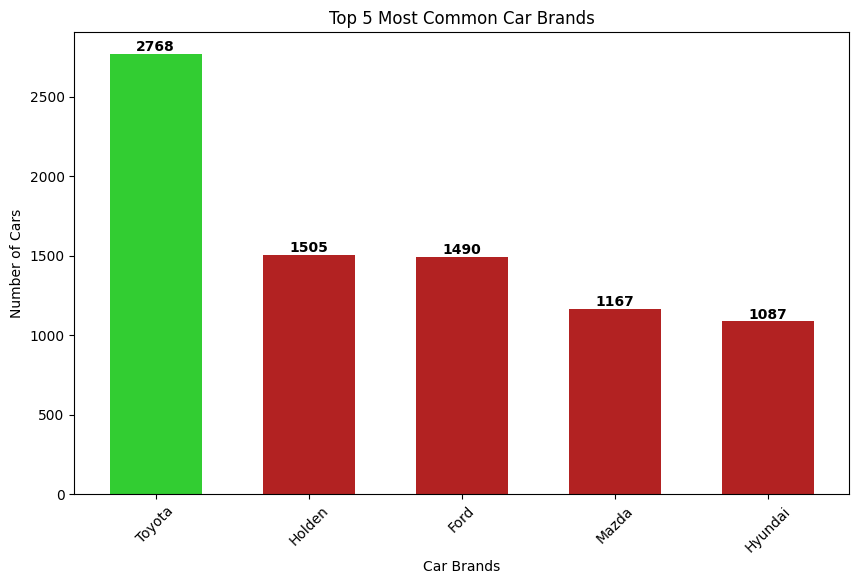

In [6]:
colors = ['limegreen' if brand == 'Toyota' else 'firebrick' for brand in common_brands.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(common_brands.index, common_brands.values, color = colors, width=0.6)
plt.xlabel('Car Brands')
plt.ylabel('Number of Cars')   
plt.title('Top 5 Most Common Car Brands')
plt.xticks(rotation=45)

# Add values labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

### Question 2: What is the average price of used vs. new cars?

In [7]:
# Checking the elements of the 'Status' column
cars['Status'].value_counts()


Status
Used            16304
Demo              387
New In Stock      357
Name: count, dtype: int64

We can see that there are 3 types of status: 'New In Stock', 'Used', and 'Demo'. With Used cars being the most common with overwhelming majority. 

In [8]:
cars['Status'] = cars['Status'].str.strip().str.title()

# Checking the elements of the 'Status' column
cars['Status'].unique()  # It seems we can use 'New' instead of 'New In Stock'

# Replacing 'New In Stock' with 'New'
cars['Status'] = cars['Status'].replace('New In Stock','New')

# Converting the 'Status' column to a categorical type
cars['Status'] = pd.Categorical(cars['Status'], categories=['New', 'Used', 'Demo'])

# Checking the elements of the 'Status' column again
cars['Status'].unique()

['Used', 'New', 'Demo']
Categories (3, object): ['New', 'Used', 'Demo']

In the previous attempt, the average price returned $nan when I tried to subset the data, I would think it was because of white space in the 'New In Stock', so I replaced that with New and now we can proceed with subsetting.

In [9]:
# Subsetting the data to find the average price of cars by status
used_cars = cars[cars['Status'] == 'Used']
new_cars = cars[cars['Status'] == 'New']

# Calculating average prices
avg_price_used = used_cars['Price'].mean()
avg_price_new = new_cars['Price'].mean()

print(f"Average price of used cars: ${avg_price_used:.2f}")
print(f"Averge price of new cars: ${avg_price_new:.2f}")


Average price of used cars: $35638.71
Averge price of new cars: $55703.21


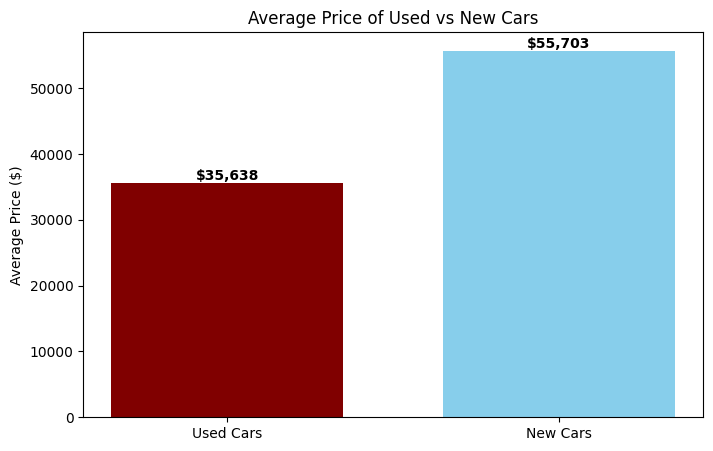

In [10]:
#Visualising the average prices of used and new cars
plt.figure(figsize=(8,5))
bars = plt.bar(['Used Cars','New Cars'], [avg_price_used, avg_price_new], color = ['maroon','skyblue'], width=0.7)
plt.ylabel('Average Price ($)')
plt.title('Average Price of Used vs New Cars')

# Add value labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()


It's common sense that the average price of old cars car significantly lower than new cars. This could be the key driver to why there are so many buyers of used cars in the market at the moment, compared to that of brand new cars.

### Question 3: What is the most common fuel type used in the cars

In [11]:
# Inspecting the 'Fuel' column
cars['Fuel'].unique() 

array(['Unleaded Petrol', 'Diesel', 'Premium Unleaded Petrol',
       'Premium Unleaded/Electric', 'Unleaded Petrol/Electric',
       'Liquid Petroleum Gas', 'Diesel/Electric'], dtype=object)

The 'Fuel' column contains various fuel types, which are stored as an array, we would need to convert them to a Categorical type.

In [12]:
# Clean up the 'Fuel' column
cars['Fuel'] = cars['Fuel'].str.strip().str.title()

# Converting the Fuel column to a categorical type
cars['Fuel'] = pd.Categorical(cars['Fuel'], categories = ['Unleaded Petrol', ' Diesel', 'Premium Unleaded Petrol', 
                                                          'Premium Unleaded/Electric', 'Unleaded Petrol/Electric',
                                                          'Liquid Petroleum Gas', 'Diesel/Electric',])

# Checking the unique values again
cars['Fuel'].unique()
 

['Unleaded Petrol', NaN, 'Premium Unleaded Petrol', 'Premium Unleaded/Electric', 'Unleaded Petrol/Electric', 'Liquid Petroleum Gas', 'Diesel/Electric']
Categories (7, object): ['Unleaded Petrol', ' Diesel', 'Premium Unleaded Petrol', 'Premium Unleaded/Electric', 'Unleaded Petrol/Electric', 'Liquid Petroleum Gas', 'Diesel/Electric']

In [13]:
# Finding the most common fuel types among the cars
cars['Fuel'].value_counts().head(5)

Fuel
Unleaded Petrol              7016
Premium Unleaded Petrol      3438
Unleaded Petrol/Electric      255
Premium Unleaded/Electric     194
Liquid Petroleum Gas           40
Name: count, dtype: int64

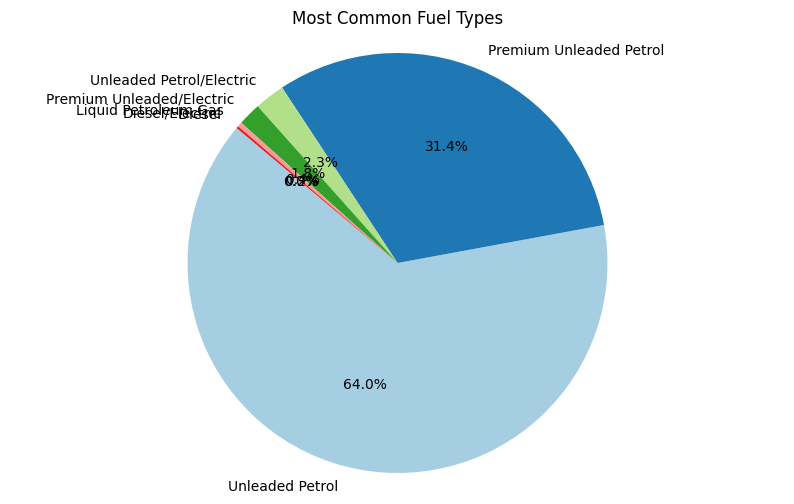

In [14]:
# Visualising the most common fuel types with pie chart
plt.figure(figsize=(10, 6))
fuel_counts = cars['Fuel'].value_counts()   
plt.pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Most Common Fuel Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Visually, the pie chart doesn't look very good, as there are too many catergories to fit into one chart, and the labels and percentage are overlapping, which makes the chart unnecessarily cluttered. We are going to adopt the approach where categories with percentage smaller than 1% would grouped as 'Others' type.

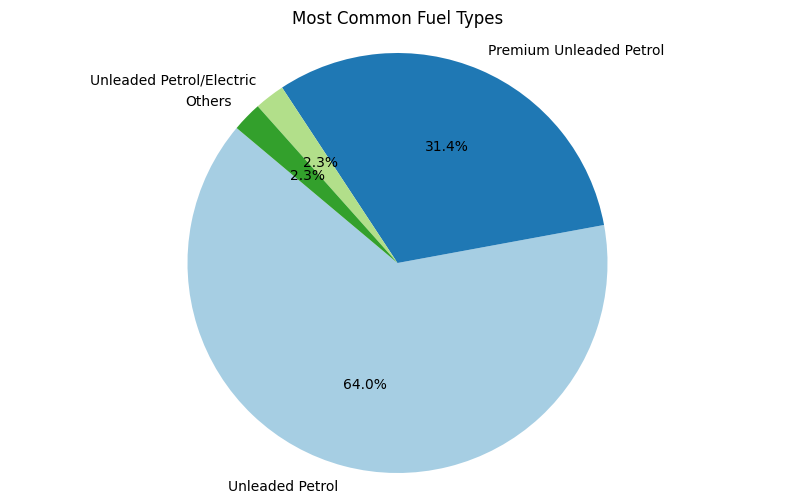

In [15]:
# Grouping the uncommon fuel types into 'Other'
if len(fuel_counts) > 4:
    top_fuels = fuel_counts.head(3)
    other_sum = fuel_counts[3:].sum()
    fuel_counts = pd.concat([top_fuels, pd.Series({'Others': other_sum})])

# Plotting the updated pie chart
plt.figure(figsize=(10, 6)) 
plt.pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Most Common Fuel Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

It can be inferred from the lie chart that cars that use Unleaded Petrol accounts for the largest share of the grand total number of cars in the market. According to multiple sources, the Premium Unleaded Petrol gives a boost to a car's performance as it provide more resistance to premature ignition (knocking) in the engine. However, drivers seem to prefer Unleaded potentially due to its affordability.

### Question 4: How does the average car price vary by car type (e.g., SUV, Wagon, Cabriolet)?

In [16]:
# Inspecting Car types
cars['Type'].value_counts().head(10)

Type
Wagon                 7768
Hatchback             2424
Sedan                 2325
Dual Cab Utility       657
Coupe                  471
Double Cab Pick Up     425
Cab Chassis            424
Dual Cab Pick-up       423
Van                    384
Crew Cab Pickup        269
Name: count, dtype: int64

In [17]:
# Getting the average price of cars by type
avg_price_type = cars.groupby('Type')['Price'].mean().round(2).sort_values(ascending=False).head()
print(avg_price_type)

Type
Saloon                150835.08
Coach                  95467.00
Sportback              88554.33
Double Cab Chassis     87074.94
Fastback               75083.03
Name: Price, dtype: float64


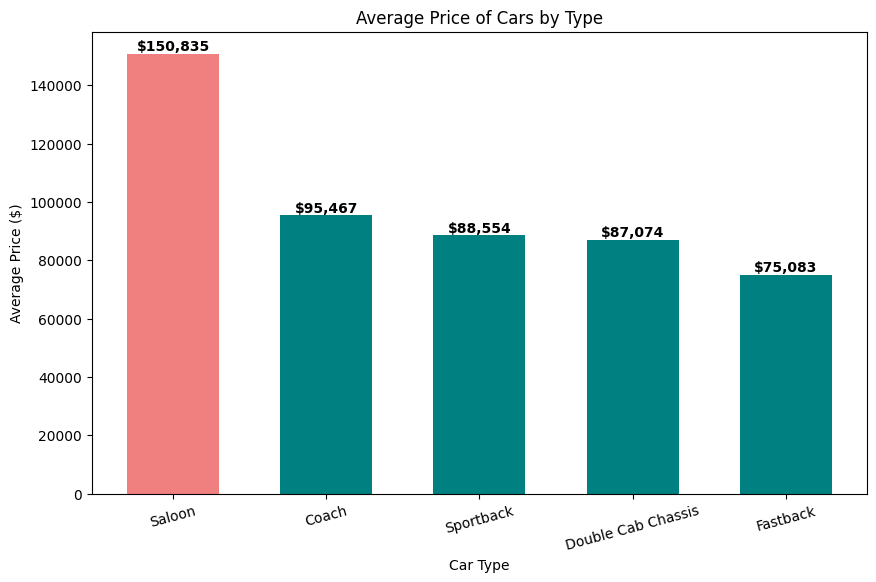

In [18]:
# Visualisation of the average price of cars by type
colors = ['lightcoral' if type == 'Saloon' else 'teal' for type in avg_price_type.index]

plt.figure(figsize = (10,6))
bars = plt.bar(avg_price_type.index, avg_price_type.values, color=colors, width=0.6)
plt.xlabel('Car Type')
plt.ylabel('Average Price ($)')
plt.title('Average Price of Cars by Type')
plt.xticks(rotation=15)

# Add value labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

It is evident that Saloon cars are the most expensive cars, let's figure out why it is so expensive.

In [19]:
# We are now going to find out what car brands are associated with Saloon type
saloon_brands = cars[cars['Type'] == 'Saloon']['Brand'].value_counts()
print(saloon_brands)

Brand
Mercedes-Benz    11
Jaguar            1
BMW               1
Name: count, dtype: int64


In [20]:
# Getting the average price of Saloon Mercedes-Benz, Jaguar, and BMW cars respectively
mercedes_avg_price = cars[(cars['Brand'] == 'Mercedes-Benz') & (cars['Type'] == 'Saloon')]['Price'].mean()
jaguar_avg_price = cars[(cars['Brand'] == 'Jaguar') & (cars['Type'] == 'Saloon')]['Price'].mean()
bmw_avg_price = cars[(cars['Brand'] == 'BMW') & (cars['Type'] == 'Saloon')]['Price'].mean()        

print(f"Average price of Mercedes-Benz Saloon: ${mercedes_avg_price:.2f}")
print(f"Average price of Jaguar Saloon: ${jaguar_avg_price:.2f}")
print(f"Average price of BMW Saloon: ${bmw_avg_price:.2f}")


Average price of Mercedes-Benz Saloon: $155078.73
Average price of Jaguar Saloon: $79990.00
Average price of BMW Saloon: $175000.00


It can be inferred that due to the majority of Mercedes-Benz cars are Saloon type, averaging already at $155,078, along with some other high-end car brands such as BMW or Jaguar also contributing to the overwhelmingly high mean price for Saloon cars.

### Question 5: What is the relationship between car age and price

In [21]:
# Subsetting the data to find the age of the cars (utilising the 'Year' column)
current_year = pd.to_datetime('today').year
cars['Age'] = current_year - cars['Year']

# Selecting only the cars age and its price
age_price = cars[['Age', 'Price']].copy()
age_price.head()

,Age,Price
0,15,9999
1,4,117990
2,4,79990
3,15,34990
4,9,15990


In [22]:
## Correlation between age and price 
correlation = age_price['Age'].corr(age_price['Price'])
print(f"Correlation between age and price: {correlation:.2f}")

Correlation between age and price: -0.49


From the correlation score, we can infer that there is a moderate negative linear relationship between how long the car has been around and its price.

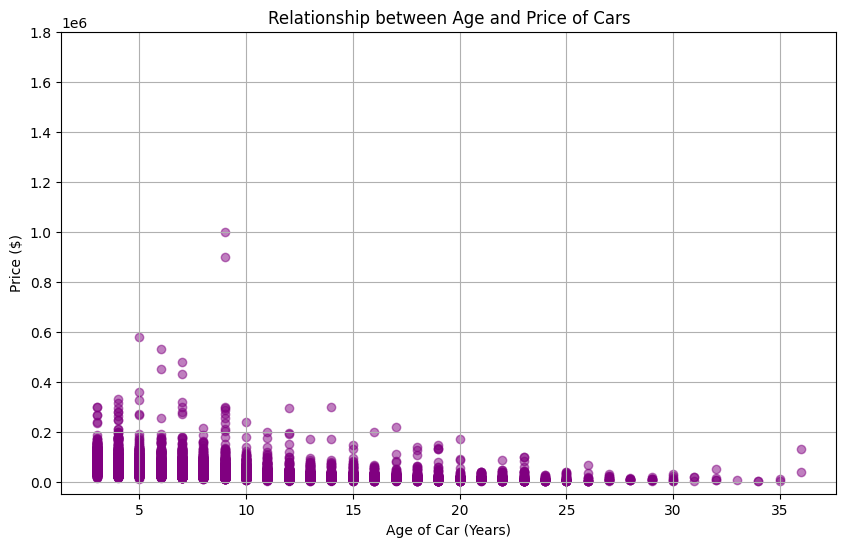

In [23]:
# Visualise the relationship between age and price
plt.figure(figsize = (10,6))
plt.scatter(age_price['Age'], age_price['Price'],alpha=0.5, color='purple')
plt.title('Relationship between Age and Price of Cars')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Price ($)')
plt.yticks(np.arange(0, 2000000, 200000))
plt.grid(True)
plt.show()

Based on the scatter plot of car age vs. price, we can generally deduce that there is a negative relationship between the age of a car and its price. As the age of the car increases, the price generally decreases. This means older cars tend to be less expensive, which is expected due to depreciation over time. The plot likely shows a downward trend, confirming that newer cars are valued higher in the market. Although the correlation is not strong, but the linear relationship is present, some factors that we could take into consideration is the kilometers that the car had gone for, for the type of car, the brand reputation, etc.

### Question 6: Which brands offer the highest average seating capacity?

In [24]:
# Getting the average seating capacity of cars by brands
avg_seating_capacity = cars.groupby('Brand')['Seating Capacity'].mean().round(1).sort_values(ascending = False).head(10)
print(avg_seating_capacity)

Brand
Mahindra      7.0
Proton        7.0
Dodge         5.9
Kia           5.8
Haval         5.6
Ssangyong     5.5
Nissan        5.4
Skoda         5.4
Mitsubishi    5.4
Toyota        5.3
Name: Seating Capacity, dtype: float64


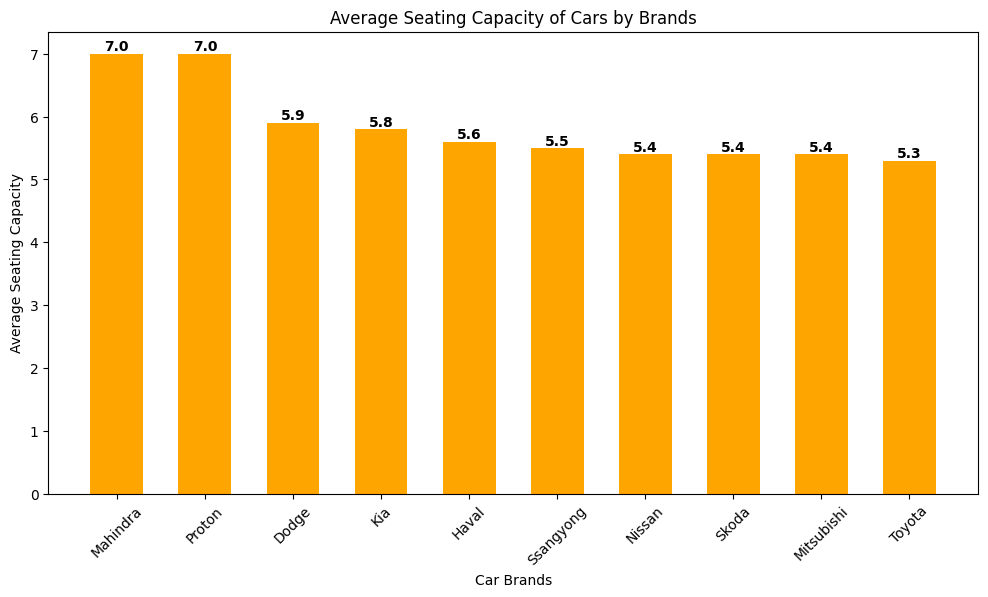

In [25]:
# Visualise the seating capacity of cars by brands
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_seating_capacity.index, avg_seating_capacity.values, color='orange', width=0.6)
plt.xlabel('Car Brands')
plt.ylabel('Average Seating Capacity')
plt.title('Average Seating Capacity of Cars by Brands')

# Add value labels on top of the bars
for bar in bars:  
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.xticks(rotation=45)
plt.show()

According to the visualisation, Mahindra and Proton share the 1st place as two brands that offer the most seating capacity. Noticeably, Japanese made car brands such as Nissan, Mitsubishi, Toyota typically offers 5 seats or more in a single car.

### Question 7: Which combination of brand and model offers the best value (lowest price per 1,000 km driven)?

We are going to use the metric: Price / Kilometers to evaluate which combination of brand and models offer the best value. I'm essentially looking to find which cars give you the most kilometers for the price you pay

In [26]:
# Remove entries where 'Seating Capacity' is 0 or less than 1000 to avoid division errors or new cars that haven't been driven yet
cars_filtered = cars[cars['Kilometers'] >= 1000]

# Calculating the Value Metric
cars_filtered['Price_per_1000km'] = round(cars_filtered['Price'] / (cars_filtered['Kilometers'] / 1000),1)

# Group by Brand and Model 
value_by_model = cars_filtered.groupby(['Brand','Model'])['Price_per_1000km'].mean().reset_index()

value_by_model = value_by_model.sort_values(by='Price_per_1000km', ascending=False).head(10)

In [27]:
value_by_model.head(5)

,Brand,Model,Price_per_1000km
79,BMW,8,283984.8
25,Audi,RS Q8,79699.9
423,Mercedes-Benz,GT,74999.8
21,Audi,RS 5,73664.5
22,Audi,RS 6,71991.8


Based on the result, the top 5 combinations that offer the best value are:
- BMW 8
- Audi RS Q8
- Mercedez-Benz GT
- Audi RS 5
- Audi RS 6

### Question 8: What is the trend in car availability over years, and how does it correlate with seating capacity or fuel type?

First, we would need to examine the number of cars in each year.

In [28]:
# Getting the count of cars for each manufacture year
year_counts = cars['Year'].value_counts().sort_index()
year_counts.head(10)


Year
1989     2
1990     2
1991     2
1992     1
1993     4
1994     3
1995     7
1996     9
1997    10
1998    16
Name: count, dtype: int64

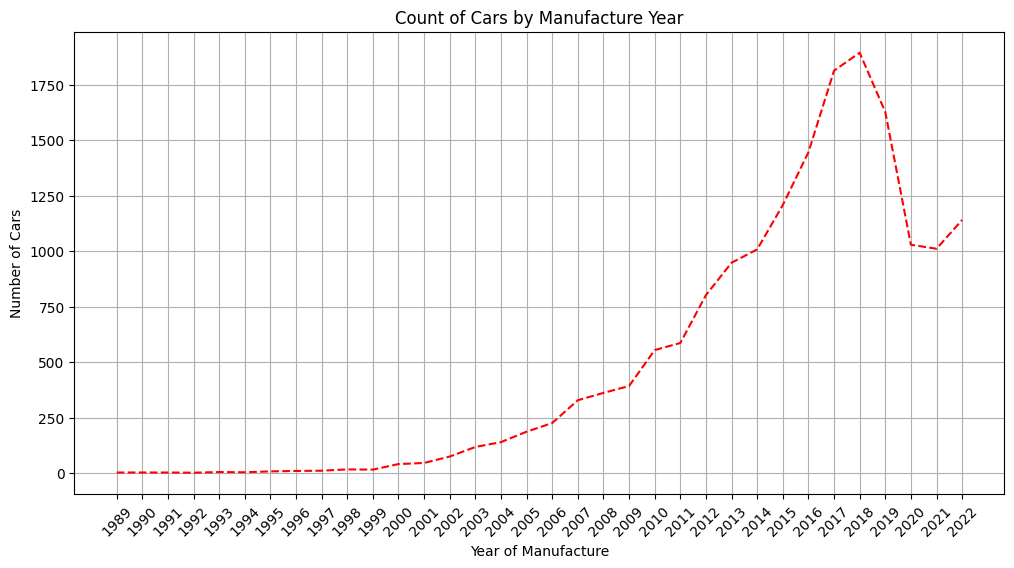

In [29]:
# Use the year as index
# Visualising the count of cars for each manufacture year
plt.figure(figsize = (12,6))
plt.plot(year_counts.index, year_counts.values, linestyle = 'dashed', color = 'red')
plt.title('Count of Cars by Manufacture Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.xticks(year_counts.index, rotation = 45)
plt.grid(True)
plt.show() 

Cars quantity in Australia soared exponentially starting in 2008 and reached its peak in 2018, with more than 1750 cars available. The number suddenly dropped as Australia entered the COVID-19 pandemic, and it is regaining its growth momentum again after 2021.

Next, we will examine the seat capacity of cars over the years to see if newer cars do offer more seating capacity.

In [30]:
## Getting the average number of seats available for a car by year
year_seats = cars.groupby('Year')['Seating Capacity'].mean().sort_index()
year_seats


Year
1989    4.000000
1990    6.000000
1991    5.000000
1992    5.000000
1993    5.500000
1994    6.000000
1995    5.142857
1996    6.111111
1997    5.200000
1998    6.000000
1999    5.400000
2000    5.150000
2001    4.888889
2002    5.027027
2003    5.162393
2004    5.172662
2005    5.026882
2006    5.000000
2007    5.021341
2008    4.952909
2009    5.040816
2010    4.985560
2011    5.081911
2012    5.052369
2013    5.023207
2014    5.109127
2015    5.060430
2016    5.012448
2017    5.122381
2018    5.184169
2019    5.260442
2020    5.179786
2021    5.170129
2022    5.193690
Name: Seating Capacity, dtype: float64

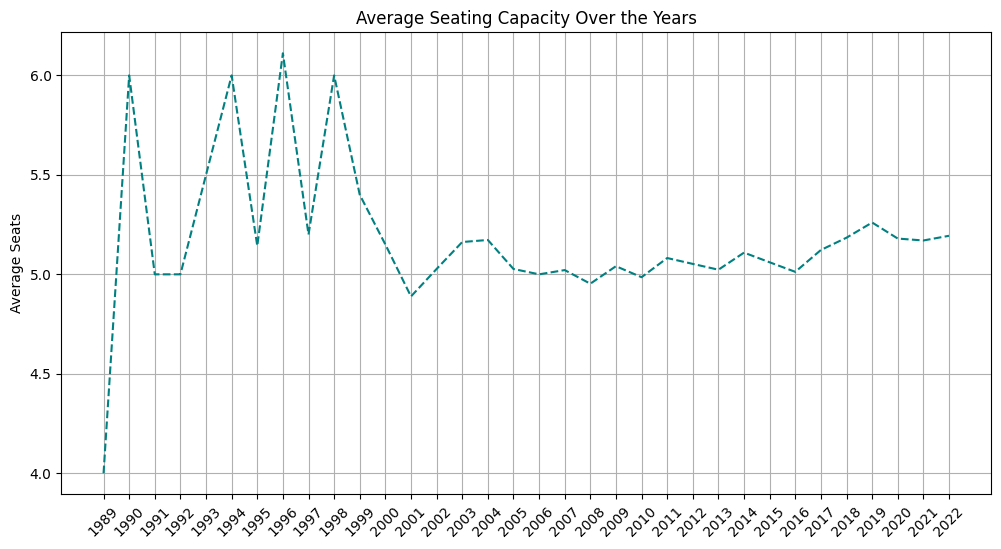

In [31]:
## Visualising the seating capacity in cars throughout the years

plt.figure(figsize = (12,6))
plt.plot(year_seats.index, year_seats, linestyle = 'dashed', color = 'teal')
plt.title('Average Seating Capacity Over the Years')
plt.xticks(year_seats.index, rotation = 45)
plt.ylabel('Average Seats')
plt.grid(True)
plt.show()


It seems that the number of seat in a car doesn't seem to change over time. Cars that were manufactured back in the 1990s had more seating capacity than ones that were manufactured in the 2000s, averaging at around 5 seats, indicating that the 5-seated cars such as Sedan, Saloon, etc. had always been a go-to option for individuals and families.

We will now examine the Fuel Type distribution over time to see if there is any change in terms of fuel preference for cars in the given time period.

In [32]:
# Grouping the fuel type by year
year_fuel = cars.groupby('Year')['Fuel'].value_counts()
pd.DataFrame(year_fuel)

count
Year Fuel                            
1989 Unleaded Petrol                1
      Diesel                        0
     Premium Unleaded Petrol        0
     Premium Unleaded/Electric      0
     Unleaded Petrol/Electric       0
...                               ...
2022 Premium Unleaded/Electric     53
     Unleaded Petrol/Electric      48
     Diesel/Electric                3
      Diesel                        0
     Liquid Petroleum Gas           0

[238 rows x 1 columns]

We are going to remove years before 2000s, as there do or did not exist electric cars or cars that used diesel, or premium unleaded petrol.

In [33]:
# Selecting a the targeted fuel types and storing them into a list
targeted_fuel_type = ['Unleaded Petrol','Premium Unleaded Petrol','Premium Unleaded/Electric','Unleaded Petrol/Electric']
# Subsetting the data to remove cars that were manufactured before 2000s
cars_after_2000s = cars[cars['Year'] >= 2000]
# Subsetting the data to only contain cars that only use targeted fuel type
cars_filtered_2 = cars_after_2000s[cars_after_2000s['Fuel'].isin(targeted_fuel_type)]
# Create a pivot table: rows=Year, columns=Fuel, values=counts
fuel_pivot = cars_filtered_2.pivot_table(index='Year', columns='Fuel', values='Brand', aggfunc='count', fill_value=0)
# Inspecting the pivot table
fuel_pivot


Fuel,Unleaded Petrol,Diesel,Premium Unleaded Petrol,Premium Unleaded/Electric,Unleaded Petrol/Electric,Liquid Petroleum Gas,Diesel/Electric
Year,,,,,,,
2000,29,0,5,0,0,0,0
2001,36,0,4,0,0,0,0
2002,55,0,10,0,0,0,0
2003,79,0,18,0,1,0,0
2004,93,0,20,0,0,0,0
2005,131,0,21,0,0,0,0
2006,144,0,43,0,2,0,0
2007,205,0,60,0,1,0,0
2008,188,0,72,0,3,0,0


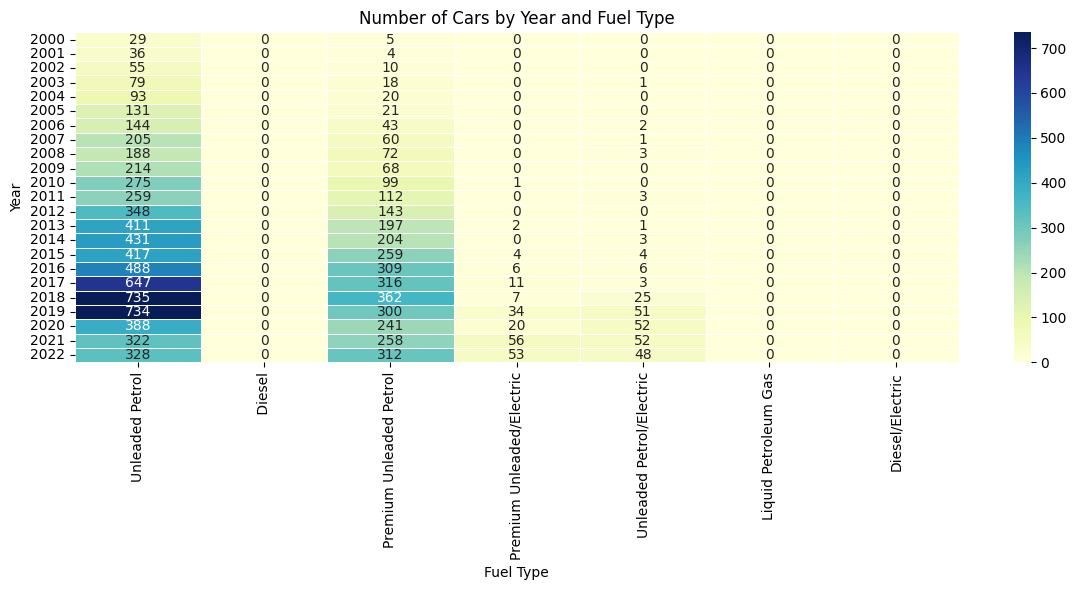

In [34]:
# Visualise the distribution of fuel type through the years
plt.figure(figsize=(12, 6))
sns.heatmap(fuel_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Number of Cars by Year and Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

It can be seen that cars Unleaded Petrol had been the key fuel for the majority of cars in Australian market, followed up by Premium Unleaded Petrol. Noticeably, Austrlian drivers only took consideration into cars that use Premium Unleaded Petrol or tagged as Electric from 2018, and the number is looking to rise in the future, now that consumers are becoming more aware and ethically responsible for the environment.